# Project Objective

To extract actionable insights from property listings on Zameen.com -such as pricing
trends, neighborhood comparisons, and listing quality -that can help real estate
investors make informed decisions.

# Problem Statement

##Where to invest in Pakistan?

---



Karachi and Lahore provides best returns

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import data set

In [153]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1jnt2UEGt-R2pKlUslVcdHwqwysrekoAZ/export?format=csv")

# Data Understanding & Preprocessing

there are a lot of empty columns

In [154]:
data.shape

(18255, 59)

In [155]:
data.head()

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## We need to remove all empty columns and just keep those which are important to our understanding and analysis.
As data.shape show there are almost 60 columns and over 18k rows

In [156]:
data.columns

Index(['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces',
       'Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
       'Flooring', 'Electricity Backup', 'Waste Disposal', 'Floors',
       'Other Main Features', 'Furnished', 'Bedrooms', 'Bathrooms',
       'Servant Quarters', 'Drawing Room', 'Dining Room', 'Kitchens',
       'Study Room', 'Prayer Room', 'Powder Room', 'Store Rooms', 'Steam Room',
       'Lounge or Sitting Room', 'Laundry Room', 'Other Rooms',
       'Broadband Internet Access', 'Satellite or Cable TV Ready', 'Intercom',
       'Community Lawn or Garden', 'Community Swimming Pool', 'Community Gym',
       'First Aid or Medical Centre', 'Day Care Centre', 'Kids Play Area',
       'Barbeque Area', 'Mosque', 'Community Centre', 'Lawn or Garden',
       'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals',
       'Nearby Shopping Malls', 'Nearby Restaurants',
       'Di

In [157]:
# Columns to drop

columns_to_drop = [
    'URL',
    'Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
    'Flooring', 'Electricity Backup', 'Waste Disposal', 'Floors',
    'Other Main Features', 'Furnished', 'Servant Quarters', 'Drawing Room',
    'Dining Room', 'Kitchens', 'Study Room', 'Prayer Room', 'Powder Room',
    'Store Rooms', 'Steam Room', 'Lounge or Sitting Room', 'Laundry Room',
    'Other Rooms', 'Broadband Internet Access', 'Satellite or Cable TV Ready',
    'Intercom', 'Community Lawn or Garden', 'Community Swimming Pool',
    'Community Gym', 'First Aid or Medical Centre', 'Day Care Centre',
    'Kids Play Area', 'Barbeque Area', 'Mosque', 'Community Centre',
    'Lawn or Garden', 'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals',
    'Nearby Shopping Malls', 'Nearby Restaurants',
    'Distance From Airport (kms)', 'Nearby Public Transport Service',
    'Other Nearby Places', 'Maintenance Staff', 'Security Staff',
    'Other Facilities']

# Drop the identified columns from data
data.drop(columns=columns_to_drop, inplace=True)


In [158]:
data.head()

,Title,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,NaN,2,2
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,NaN,2,3
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,NaN,1,2
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,1.0,1,2
4,2 Bed Apartment For Booking On 3 Years | Saima...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,NaN,2,2


In [159]:
data.shape

(18255, 12)

##Handling Duplicate Values

In [160]:
data.duplicated().sum() # there some duplicates

np.int64(198)

In [161]:
data[data.duplicated()] # checking whether these are duplicates or actual values

,Title,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms
893,Experience Luxury Living with Sea View : Stunn...,Karachi,Flat,152 Sq. Yd.,PKR\n5.8 Crore,For Sale,"DHA Defence, Karachi, Sindh",A 40 storey luxurious residential development ...,NaN,NaN,2,2
894,Experience Luxury Living with Boulevard View :...,Karachi,Flat,121 Sq. Yd.,PKR\n4.36 Crore,For Sale,"DHA Defence, Karachi, Sindh",A 40 storey luxurious residential development ...,NaN,NaN,1,1
944,"Luxury 1,755 Square Feet Flat Available For Sa...",Karachi,Flat,195 Sq. Yd.,PKR\n2.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",Otel Residency is a luxury residential apartme...,2028.0,NaN,3,3
2243,7 MARLA BRAND NEW DOUBLE STORY LOP CLEARED HOU...,Islamabad,House,7 Marla,PKR\n3.7 Crore,For Sale,"FECHS, Islamabad, Islamabad Capital","7 Marla double-story house in Jinnah Garden, I...",2025.0,NaN,5,7
2447,NaN,Islamabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16917,1 Kanal Elegant And Fully Maintained Super Hot...,Lahore,Upper Portion,1 Kanal,PKR\n80 Thousand,For,"DHA Defence, Lahore, Punjab",1 Kanal Elegant And Fully Maintained Super Hot...,NaN,NaN,3,3
16939,10 Marla Elegant And Fully Maintained Super Ho...,Lahore,House,10 Marla,PKR\n1.8 Lakh,For,"DHA Defence, Lahore, Punjab",10 Marla Elegant And Fully Maintained Super Ho...,NaN,NaN,4,5
16940,10 Marla Elegant And Fully Maintained Super Ho...,Lahore,House,10 Marla,PKR\n1.7 Lakh,For,"DHA Defence, Lahore, Punjab",10 Marla Elegant And Fully Maintained Super Ho...,NaN,NaN,4,5
17398,Studio Apartment For In Sector D Bahria Town ...,Lahore,Flat,1.3 Marla,PKR\n25 Thousand,For,"Bahria Town, Lahore, Punjab",Land Holders Real Estate and Builders is the N...,2025.0,NaN,-,1


The values seems to be duplicates.
So we have to drop those. As will not have that much impact on the data. Since the duplicates are just 208 while the dataset has more than 18000 rows.

In [162]:
data.drop_duplicates(inplace=True) # since they are duplicates we drop them

In [163]:
data.duplicated().sum()

np.int64(0)

## Checting data types and info

In [164]:
data.shape

(18057, 12)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18057 entries, 0 to 18254
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           18049 non-null  object 
 1   City            18057 non-null  object 
 2   Type            18049 non-null  object 
 3   Area            18049 non-null  object 
 4   Price           18049 non-null  object 
 5   Purpose         18049 non-null  object 
 6   Location        18049 non-null  object 
 7   Description     14734 non-null  object 
 8   Built in year   11828 non-null  float64
 9   Parking Spaces  9587 non-null   float64
 10  Bedrooms        18049 non-null  object 
 11  Bathrooms       18049 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.8+ MB


In [166]:
data.dtypes

,0
Title,object
City,object
Type,object
Area,object
Price,object
Purpose,object
Location,object
Description,object
Built in year,float64
Parking Spaces,float64


## We need to convert the price column to float. So we can do numerical calculations.


*  but there are inconsistancies
*  we will define a fuction that will first deal the missing value
*  then it will convert the crore and then lakh and then thousands


In [167]:
def convert_price_to_numeric(price_str):
    if pd.isna(price_str):
        return None           # Handle missing values
    price_str = price_str.replace("PKR\n", "").strip()
    price_str = price_str.lower()

    if "crore" in price_str:
        return float(price_str.replace("crore", "").strip()) * 10000000
    elif "lakh" in price_str:
        return float(price_str.replace("lakh", "").strip()) * 100000
    elif "thousand" in price_str:
        return float(price_str.replace("thousand", "").strip()) * 1000
    else:
        try:
            return float(price_str)
        except ValueError:
            return None         # Handle other formats


In [168]:
# applying the function and storing them in a new column named Price_Clean

data["Price_Clean"] = data["Price"].apply(convert_price_to_numeric)

In [169]:
data[["Price", "Price_Clean"]].sample(10)

# by comparing it seems the function is correct

,Price,Price_Clean
9355,PKR\n11 Crore,110000000.0
4899,PKR\n65 Lakh,6500000.0
12970,PKR\n11 Lakh,1100000.0
4040,PKR\n1.6 Crore,16000000.0
9239,PKR\n49 Lakh,4900000.0
7749,PKR\n1.82 Crore,18200000.0
9151,PKR\n7.5 Crore,75000000.0
7139,PKR\n30 Lakh,3000000.0
478,PKR\n2.65 Crore,26500000.0
5016,PKR\n6.3 Crore,63000000.0


In [170]:
# since we got a clean price column we do not need the original price column

data.drop("Price", axis=1, inplace=True)

In [171]:
data.sample(10)

,Title,City,Type,Area,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Price_Clean
415,"In Gulshan-e-Maymar - Sector W Of Karachi, A 6...",Karachi,House,600 Sq. Yd.,For Sale,"Gadap Town, Karachi, Sindh",NaN,2024.0,1.0,-,-,65000000.0
15998,10 Marla Upper Portion For,Gujranwala,Upper Portion,10 Marla,For,"Wapda Town, Gujranwala, Punjab",10 MARLA UPPER PORTION FOR NEAR BEACON HOUSE ...,NaN,NaN,3,4,32000.0
9982,Spanish Style 10.75 Marla House for Sale in Wa...,Gujranwala,House,10 Marla,For Sale,"Wapda Town, Gujranwala, Punjab","""Stunning 10.75 Marla Spanish-Style House for ...",2023.0,NaN,5,5,35000000.0
10055,Gorgeous Prime Location 10 Marla House For Sal...,Gujranwala,House,10 Marla,For Sale,"Wapda Town, Gujranwala, Punjab","Hurry up, and secure your property at an amazi...",NaN,NaN,5,5,35000000.0
2988,"3 Marla Triple-Storey House for Sale Hajiabad,...",Faisalabad,House,3 Marla,For Sale,"Haji Abad, Faisalabad, Punjab","3 Marla Triple-Story House for Sale Hajiabad, ...",2018.0,3.0,4,4,8500000.0
17345,5 Marla Lavish Bungalow For In DHA Phase 9 To...,Lahore,House,5 Marla,For,"DHA Defence, Lahore, Punjab",5 Marla Lavish Bungalow For In DHA Phase 9 To...,2025.0,NaN,3,4,60000.0
12717,Brand New Luxury House For In F-10,Islamabad,House,2 Kanal,For,"F-10, Islamabad, Islamabad Capital",NaN,2024.0,25.0,9,-,1050000.0
6396,Prime Location 1358 Square Feet Flat For Sale ...,Peshawar,Flat,6 Marla,For Sale,"University Town, Peshawar, Khyber Pakhtunkhwa",Prime Town Appartment university town \n3 Bedr...,NaN,NaN,3,3,16000000.0
9861,Faisal Hills 5 Marla House Available For Sale ...,Taxila,House,5 Marla,For Sale,"Faisal Hills, Taxila, Punjab",Faisal hills Islamabad \n\n5 Marla house avail...,NaN,NaN,4,5,13000000.0
3705,A Prime Location House Of 10 Marla On Satiana ...,Faisalabad,House,10 Marla,For Sale,"Satiana Road, Faisalabad, Punjab","10 Marla property is up for sale, so enquire t...",2023.0,2.0,-,-,32500000.0


## Data Type conversion

*   Bedrooms
*   Bathrooms



In [172]:
data["Bedrooms"] = pd.to_numeric(data["Bedrooms"], errors="coerce")
data["Bathrooms"] = pd.to_numeric(data["Bathrooms"], errors="coerce")

## Dealing Area Column

We will define a function which take area as a string and perform some action to calculate area in  "sq ft"

In [173]:
def convert_area_to_sq_ft(area_str):
    if pd.isna(area_str):
        return None
    area_str = area_str.lower().strip()

    # Handle ranges like '10-12 marla' by taking the first value
    if '-' in area_str:
      try:
        # Taking the first number in a range
        area_str = area_str.split('-')[0].strip()
      except:
        return None # Handle cases where splitting fails

    if 'sq. yd.' in area_str:
        try:
            return float(area_str.replace('sq. yd.', '').strip()) * 9
        except ValueError:
            return None
    elif 'marla' in area_str:
        try:
            return float(area_str.replace('marla', '').strip()) * 272.25 # Approximate conversion
        except ValueError:
            return None
    elif 'kanal' in area_str:
        try:
            return float(area_str.replace('kanal', '').strip()) * 5445 # Approximate conversion
        except ValueError:
            return None

    elif 'sq. ft.' in area_str:
         try:
            return float(area_str.replace('sq. ft.', '').strip())
         except ValueError:
            return None
    else:
        try:
            # Attempt to convert directly if no units are found
            return float(area_str)
        except ValueError:
            return None # Handle other formats or unhandled units

In [174]:
# Now applying this function to 'Area' column

data["Area_in_sq_ft"] = data["Area"].apply(convert_area_to_sq_ft)

In [175]:
# convert the data type using astype function

data["Area_in_sq_ft"] = data["Area_in_sq_ft"].astype(float)

## Dealing entries where area given is zero

since these are only 6 entries we will drop them.

In [176]:
data[data["Area_in_sq_ft"] == 0]

,Title,City,Type,Area,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Price_Clean,Area_in_sq_ft
4965,BRAND NEW 5 MARLA HOUSE FOR SAL BAHRIA TOWN RA...,Rawalpindi,House,0 Marla,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab",for sale \n\nali block. \n3 bed room \ndrawing...,NaN,NaN,3.0,4.0,20000000.0,0.0
9733,House Of 1 Square Feet Available In Chilas,Chilas,House,0 Marla,For Sale,"Chilas, Chilas, Gilgit Baltistan",You can pay a fair price of PKR Rs. 3000000 in...,NaN,NaN,2.0,2.0,3000000.0,0.0
10810,40k al Income Near Qdps 2 Min Walk From Main G...,Gujranwala,House,0 Marla,For Sale,"Shaheen Abad, Gujranwala, Punjab",NaN,NaN,NaN,6.0,NaN,14000000.0,0.0
14292,05 Marla Ultra Luxurious Designer Flat For Mu...,Multan,Flat,0 Marla,For,"Wapda Town, Multan, Punjab",NaN,2024.0,1.0,1.0,1.0,65000.0,0.0
15849,A House Of 3 Square Feet In Jalil Town,Gujranwala,House,0 Marla,For,"Jalil Town, Gujranwala, Punjab",Rs. 14000 is quite reasonable for the kind of ...,NaN,NaN,2.0,1.0,14000.0,0.0
16081,Corner Flat,Gujranwala,Flat,0 Marla,For,"Jalil Town, Gujranwala, Punjab",A Flat in Jalil Town is the best opportunity y...,NaN,NaN,1.0,2.0,13000.0,0.0


In [177]:
data = data[data['Area_in_sq_ft'] != 0]

**We no longer need area column so we will drop it**

In [178]:
data.drop("Area", axis=1, inplace= True) #dropping area column

# Missing Values Treatment

In [179]:
(data.isnull().sum()/len(data))*100 # showing percentage of missing values

,0
Title,0.044319
City,0.000000
Type,0.044319
Purpose,0.044319
Location,0.044319
Description,18.397873
Built in year,34.480084
Parking Spaces,46.894909
Bedrooms,4.963714
Bathrooms,6.060606


### We will drop column Built in Year. reasons are below

*   It has almost 35% values missing
*   And the values which are given include 1, 2 and other value which don't indicate year correctly.



In [180]:
data.drop("Built in year", axis=1, inplace=True)

## We will drop those rows which has less than 1% missing values

In [181]:
data.dropna(subset=["Title", "Location", "Type", "Area_in_sq_ft", "Price_Clean","Purpose"], inplace=True)

**If there is a missing value in parking it can be assumed that it has no parking. Thus we will put 0 there.**

In [ ]:
data["Parking Spaces"].fillna(0,inplace=True)

**We will put no description in missing values in descripton column**

In [183]:
data["Description"].fillna("No Description", inplace=True)

/tmp/ipython-input-2432776791.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Description"].fillna("No Description", inplace=True)


In [184]:
data.isnull().sum()

,0
Title,0
City,0
Type,0
Purpose,0
Location,0
Description,0
Parking Spaces,0
Bedrooms,874
Bathrooms,1066
Price_Clean,0


## Checking if there are any outliers in bedrooms and bathrooms columns



*   The boxplot suggest there are some houses which has many bedrooms and is treated as outliers
*   But many houses have that much in congest areas.
*   Also data[(data["Bedrooms"] > 10)] the result ofthis code indicates that these are in fact correct values.



<Axes: ylabel='Bedrooms'>

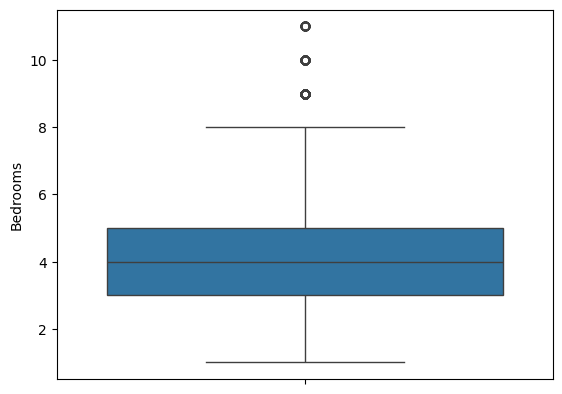

In [185]:
sns.boxplot(data["Bedrooms"])

In [186]:
data[(data["Bedrooms"] > 10)]

,Title,City,Type,Purpose,Location,Description,Parking Spaces,Bedrooms,Bathrooms,Price_Clean,Area_in_sq_ft
106,80sq yard house fully furnished Ground +3 with...,Karachi,House,For Sale,"Jamshed Town, Karachi, Sindh",80sq yard house fully furnished\nGround +3 wit...,0.0,11.0,7.0,26500000.0,720.000
131,Prominently-Located Prime Location 90 Square Y...,Karachi,House,For Sale,"Liaquatabad, Karachi, Sindh",NEW CONSTRUCTION HOUSE FOR SALE IN LIQAUATABAD...,0.0,11.0,7.0,26000000.0,810.000
420,4 floors GROUND PLUS 3 HOUSE Available For Sal...,Karachi,House,For Sale,"North Nazimabad, Karachi, Sindh",VERY WELL PLANNED \nGROUND PLUS 3 HOUSE \n Ava...,2.0,11.0,7.0,70000000.0,2304.000
925,256 Sq Yard G+2 Brand New House Available For ...,Karachi,House,For Sale,"Scheme 33, Karachi, Sindh",New Build House for sale \n2 side corner West ...,0.0,11.0,7.0,65000000.0,2304.000
1147,300 Yard Corner G+1+Penthouse For Sale At Prim...,Karachi,House,For Sale,"Scheme 33, Karachi, Sindh",House Available For Sale\nBungalow Available F...,0.0,11.0,6.0,46000000.0,2700.000
1745,"Sumbal Road,& Ahmed Faraz Road Corner Bungalow...",Islamabad,House,For Sale,"F-10, Islamabad, Islamabad Capital","Bungalow For Sale In F-10, Islamabad Sumbal Ro...",10.0,11.0,7.0,400000000.0,11979.000
2558,LUXURY HOUSE FOR SALE,Faisalabad,House,For Sale,"Canal Road, Faisalabad, Punjab",No Description,0.0,11.0,7.0,450000000.0,24502.500
3288,7 Marla Brand New Build Plaza For Sale Near to...,Faisalabad,House,For Sale,"Madina Town, Faisalabad, Punjab",(FOR SALE)\n *7 Marla Brand New Build Plaza Fo...,0.0,11.0,7.0,65000000.0,1905.750
3443,LUXURY HOUSE FOR SALE,Faisalabad,House,For Sale,"Canal Road, Faisalabad, Punjab",BRAND NEW HOUSE FOR SALE \n11 BED ROOMS \nTV L...,0.0,11.0,7.0,450000000.0,21780.000
3524,33 Marla House For Sale On jail Road,Faisalabad,House,For Sale,"Jail Road, Faisalabad, Punjab",Beautiful location Near DMC School situated on...,2.0,11.0,7.0,250000000.0,8712.000


**Since there are no real outliers we will fill the missing values with mean**

In [187]:
data["Bedrooms"].fillna(data["Bedrooms"].mean(), inplace=True)

/tmp/ipython-input-1240857484.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Bedrooms"].fillna(data["Bedrooms"].mean(), inplace=True)


**Since bathrooms too has no real outliers we will treat it the same way as we did bedrooms column**

<Axes: ylabel='Bathrooms'>

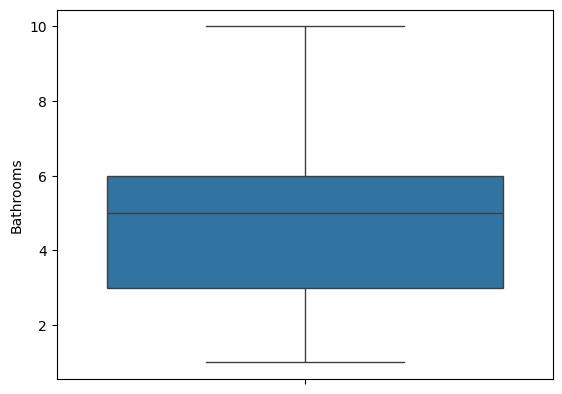

In [188]:
sns.boxplot(data["Bathrooms"])

In [189]:
data[data["Bathrooms"] > 7]

,Title,City,Type,Purpose,Location,Description,Parking Spaces,Bedrooms,Bathrooms,Price_Clean,Area_in_sq_ft
1359,Brand New House For Sale Prime Location,Islamabad,House,For Sale,"F-8, Islamabad, Islamabad Capital",We Are Pleased To Bring To Market And Offer Fo...,2.0,9.0,10.0,300000000.0,7078.5
6109,Prime Location House For Sale Is Readily Avail...,Rawalpindi,House,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab",House is available for sale in bahria town pha...,0.0,6.0,8.0,58000000.0,5445.0


In [190]:
data["Bathrooms"].fillna(data["Bathrooms"].mean(), inplace=True)

/tmp/ipython-input-1700201457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Bathrooms"].fillna(data["Bathrooms"].mean(), inplace=True)


# Data Cleaning & Consistency

## Refining the Purpose column

Purpose column has "For Sale" and "For". We need to change "For" to "Rental".

In [191]:
data["Purpose"] = data["Purpose"].str.strip()

In [192]:
data["Purpose"] = data["Purpose"].replace("For", "Rental")

## Cleaning city name

In [193]:
data.City.unique()

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Nowshera', 'Mardan',
       'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan', 'Okara', 'Attock',
       'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar', 'Kasur', 'Mirpur',
       'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas', 'Swat', 'Daska',
       'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa', 'Lodhran', 'Pakpattan',
       'Chiniot', 'Dera Ismail Khan', 'Fateh Jang', 'Burewala',
       'Hafizabad', 'Talagang', 'Vehari', 'Jamshoro', 'Galyat',
       'Gujranwala', 'Kharian', 'Karachi ', 'Islamabad ', 'Faisalabad ',
       'Multan ', 'Rawalpindi ', 'Gujranwala ', 'Peshawar ', 'Lahore ',
       'Jhelum ', 'Hyderabad ', 'Sialkot  ', 'Murree ', 'Bahawalpur ',
       'Abbottabad ', 'Wah ', 'Gujrat ', 'Sahiwal ', 'Sheikhupura ',
       'Sargodha ', 'R

In [194]:
# here we can see that rawalpindi is repeating
# thus we will clean using fuzzy wuzzy

data["City"].value_counts()

,count
City,
Islamabad,1245
Rawalpindi,1245
Lahore,1231
Rawalpindi,1228
Islamabad,1219
...,...
Galyat,1
Sarai Alamgir,1
Nowshera,1


## Installing and importing fuzzywuzzy

In [195]:
!pip install fuzzywuzzy python-Levenshtein

In [196]:
from fuzzywuzzy import fuzz, process

**we need to create a refrence list**

In [197]:
#create a reference_list

reference_list = data["City"].str.strip(" ").str.title().unique().tolist()

In [198]:
reference_list

['Karachi',
 'Islamabad',
 'Faisalabad',
 'Multan',
 'Rawalpindi',
 'Peshawar',
 'Jhelum',
 'Murree',
 'Hyderabad',
 'Bahawalpur',
 'Sialkot',
 'Abbottabad',
 'Sahiwal',
 'Lahore',
 'Gujrat',
 'Wah',
 'Sargodha',
 'Sheikhupura',
 'Chakwal',
 'Nowshera',
 'Mardan',
 'Sarai Alamgir',
 'Quetta',
 'Rahim Yar Khan',
 'Okara',
 'Attock',
 'Dera Ghazi Khan',
 'Taxila',
 'Sukkur',
 'Gwadar',
 'Kasur',
 'Mirpur',
 'Haripur',
 'Gujar Khan',
 'Gharo',
 'Mirpur Khas',
 'Swat',
 'Daska',
 'Sadiqabad',
 'Buner',
 'Jhang',
 'Lalamusa',
 'Lodhran',
 'Pakpattan',
 'Chiniot',
 'Dera Ismail Khan',
 'Fateh Jang',
 'Burewala',
 'Hafizabad',
 'Talagang',
 'Vehari',
 'Jamshoro',
 'Galyat',
 'Gujranwala',
 'Kharian']

**Defiining function**

In [199]:
def correct_city_name(name):
  match, score = process.extractOne(name,reference_list)
  return match

In [200]:
data["City"] = data["City"].apply(correct_city_name)

In [201]:
data["City"].unique()

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Nowshera', 'Mardan',
       'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan', 'Okara', 'Attock',
       'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar', 'Kasur', 'Mirpur',
       'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas', 'Swat', 'Daska',
       'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa', 'Lodhran', 'Pakpattan',
       'Chiniot', 'Dera Ismail Khan', 'Fateh Jang', 'Burewala',
       'Hafizabad', 'Talagang', 'Vehari', 'Jamshoro', 'Galyat',
       'Gujranwala', 'Kharian'], dtype=object)

## Dealing Property Type

In [202]:
data["Type"].value_counts()

,count
Type,
House,13019
Flat,2873
Upper Portion,1225
Lower Portion,555
Farm House,83
Room,43
Penthouse,21


Since Rooms do not add any value here and are pretty low in numbers too.
Also this study intends to address invetment advice. Thus single rooms for rent do not serve our purpose

In [203]:
# dropping single room entries

data = data[data["Type"] != "Room"]

In [204]:
data["Type"].value_counts()

,count
Type,
House,13019
Flat,2873
Upper Portion,1225
Lower Portion,555
Farm House,83
Penthouse,21


# **Feature Engineering**

## Adding price_per_sq_ft

In [205]:
# Calculate price per square foot

data["Price_per_Sq_Ft"] = data["Price_Clean"] / data["Area_in_sq_ft"]

# Round the results to 2 decimal places

data["Price_per_Sq_Ft"] = data["Price_per_Sq_Ft"].round(2)


In [207]:
data.head()

,Title,City,Type,Purpose,Location,Description,Parking Spaces,Bedrooms,Bathrooms,Price_Clean,Area_in_sq_ft,Price_per_Sq_Ft
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,Karachi,Flat,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,0.0,2.0,2.0,47500000.0,1152.0,41232.64
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,Karachi,Flat,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,0.0,2.0,3.0,62500000.0,1449.0,43133.20
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,Karachi,Flat,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,0.0,1.0,2.0,34500000.0,999.0,34534.53
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,Karachi,Flat,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,1.0,1.0,2.0,29800000.0,954.0,31236.90
4,2 Bed Apartment For Booking On 3 Years | Saima...,Karachi,Flat,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,0.0,2.0,2.0,46500000.0,1404.0,33119.66


Analysing Price_Clean column for outliers. And to see how to work with rental and For Sale prices

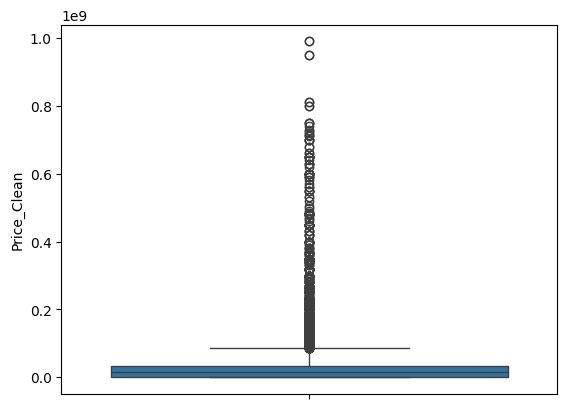

In [208]:
sns.boxplot(data["Price_Clean"])
plt.show()

In [209]:
#IQR

Q1 = data["Price_Clean"].quantile(0.25)
Q3 =  data["Price_Clean"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5* IQR


In [210]:
data[(data["Price_Clean"] < lower_bound) | (data["Price_Clean"] > upper_bound)].describe()

,Parking Spaces,Bedrooms,Bathrooms,Price_Clean,Area_in_sq_ft,Price_per_Sq_Ft
count,1157.000000,1157.000000,1157.000000,1.157000e+03,1157.000000,1157.000000
mean,4.316335,5.702318,5.773254,1.879612e+08,8146.274546,29367.944633
std,59.571220,1.481091,0.925521,1.425826e+08,19045.601420,15290.976854
min,0.000000,1.000000,1.000000,8.640000e+07,1737.000000,553.050000
25%,0.000000,5.000000,6.000000,1.050000e+08,5172.750000,18365.470000
50%,2.000000,6.000000,6.000000,1.330000e+08,5445.000000,24487.300000
75%,4.000000,6.000000,6.000000,2.000000e+08,7078.500000,36730.950000
max,2015.000000,11.000000,10.000000,9.900000e+08,479160.000000,96418.730000


In [211]:
# After checking for the max values
# We can see that the properties in Islamabad premium sector are indeed expensive.
# Thus these are not errors


data[data["Price_Clean"] > 900000000.0]

,Title,City,Type,Purpose,Location,Description,Parking Spaces,Bedrooms,Bathrooms,Price_Clean,Area_in_sq_ft,Price_per_Sq_Ft
1524,E-7 House For Sale. . . . . Lavish Area And Ho...,Islamabad,House,For Sale,"E-7, Islamabad, Islamabad Capital",Zawiya Enterprises Is An Established Real Esta...,3.0,7.0,7.0,990000000.0,10345.5,95693.78
1648,E7 HOUSE FOR SALE,Islamabad,House,For Sale,"E-7, Islamabad, Islamabad Capital",Aoa Dear Sir. . . . \nI have house for sale in...,3.0,8.0,7.0,950000000.0,10890.0,87236.00
1652,E-7 House For Sale . . . . .,Islamabad,House,For Sale,"E-7, Islamabad, Islamabad Capital",Aoa Dear Sir. . \n\nZawiya Enterprises Is An E...,5.0,8.0,7.0,950000000.0,10890.0,87236.00
1940,Investor Rate Prime Street Property Is For SALE,Islamabad,House,For Sale,"F-6, Islamabad, Islamabad Capital",Attached images are just for reference purpose...,0.0,6.0,6.0,990000000.0,27225.0,36363.64


The above analysis confirms that we need separate treatment for price column.

## Make 2 data frames

The prices column has a problem. It include both "For Sale" and "Rental" properties.
And
Rents are usually in thousanda while houses cost millions.

Therefore I think making two data frames is the right approach.


*   One will contain rental properties
*   One will contain properties for sale.
*   This will also enable us make bins for prices


In [212]:
# Separate data for "For Sale" and "Rental"

for_sale = data[data["Purpose"] == "For Sale"].copy()
rental = data[data["Purpose"] == "Rental"].copy()

Making prices in millions in for_sale data frame so they are easily readiable in plot etc.

In [235]:
for_sale["Price_in_m"] = for_sale["Price_Clean"]/1000000

## Bins for "For Sale" properties

In [213]:
# Bin edges for "For Sale" prices.
# labels


price_bins = [0, 10000000, 50000000, 180000000, for_sale["Price_Clean"].max()]
price_labels = ["Budget", "Mid-Range", "Premium", "Luxury"]

# Create the bins for "For Sale" data

for_sale["Price_Category"] = pd.cut(for_sale["Price_Clean"], bins=price_bins, labels=price_labels, right=True, include_lowest=True)




In [214]:
for_sale["Price_Category"].value_counts()

,count
Price_Category,
Mid-Range,7492
Premium,2150
Budget,921
Luxury,320


## Repeating the same process for Rental properties

In [215]:
# Bin edges for "For Sale" prices.
# labels


price_bins = [0, 50000, 200000, 700000, rental["Price_Clean"].max()]
price_labels = ["Budget", "Mid-Range", "Premium", "Luxury"]

# Create the bins for "Rental" data

rental["Rent_Category"] = pd.cut(rental["Price_Clean"], bins=price_bins, labels=price_labels, right=True, include_lowest=True)



In [216]:
# checking rent bins

rental["Rent_Category"].value_counts()

,count
Rent_Category,
Mid-Range,3874
Budget,1432
Premium,1358
Luxury,229


# Univariate & Bivariate Analysis

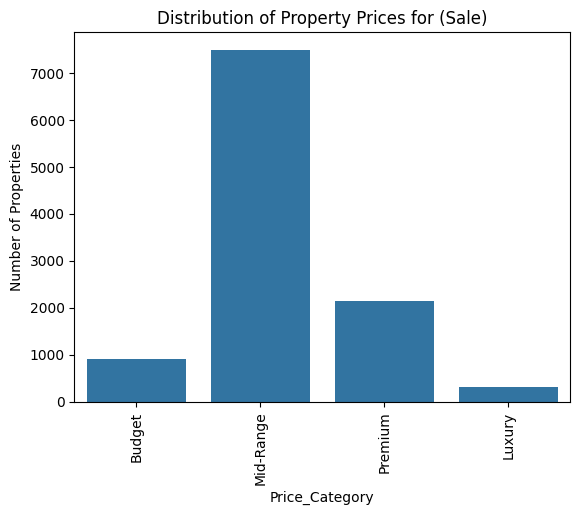

In [272]:
# Most properties for sale are in mid range

sns.barplot(for_sale[for_sale["Purpose"] == "For Sale"]["Price_Category"].value_counts())
plt.xticks(rotation=90)
plt.ylabel("Number of Properties")
plt.title("Distribution of Property Prices for (Sale)")
plt.show()

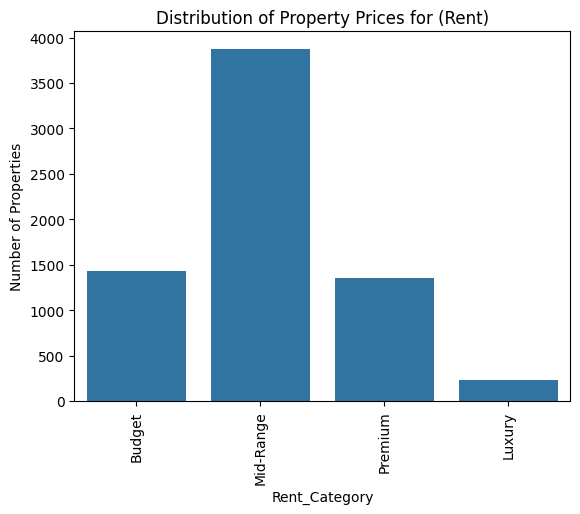

In [274]:
# most of prperties for rent are in Mid range


sns.barplot(rental[rental["Purpose"] == "Rental"]["Rent_Category"].value_counts())
plt.xticks(rotation=90)
plt.ylabel("Number of Properties")
plt.title("Distribution of Property Prices for (Rent)")
plt.show()

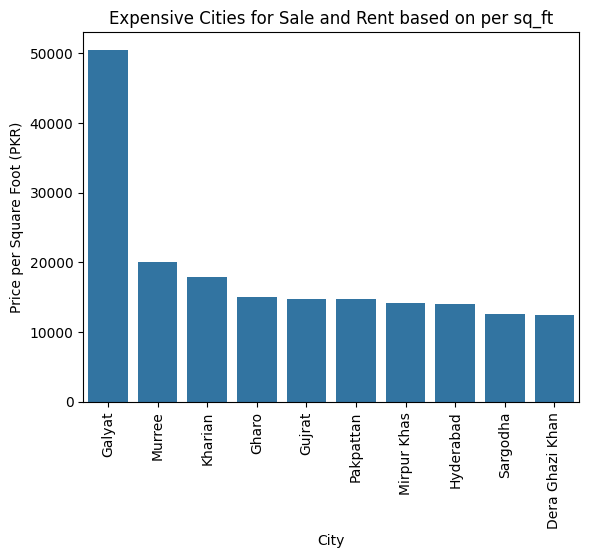

In [309]:
# Top 10 most expensive cities based on price/sq ft
# Note the results include "For Sale" and "Rental" properties.

sns.barplot(data.groupby("City")["Price_per_Sq_Ft"].mean().sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.ylabel("Price per Square Foot (PKR)")
plt.title("Expensive Cities for Sale and Rent based on per sq_ft")
plt.show()


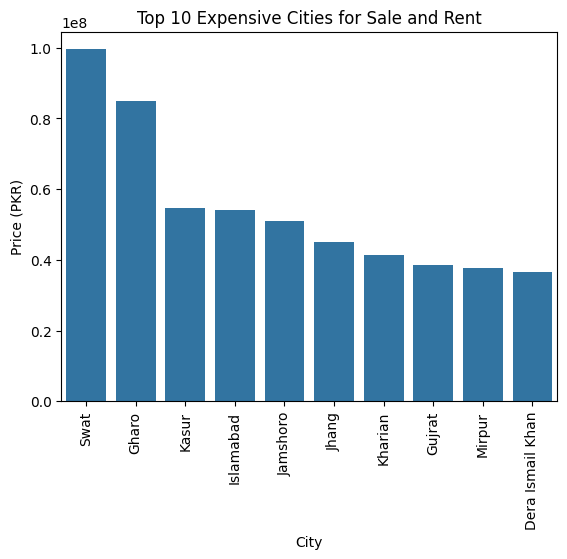

In [243]:
# Average Expensive properties by city for rent and sale

sns.barplot(data.groupby("City")["Price_Clean"].mean().sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.ylabel("Price (PKR)")
plt.title("Top 10 Expensive Cities for Sale and Rent")
plt.show()

## Expensive cities to rent (Top 10)

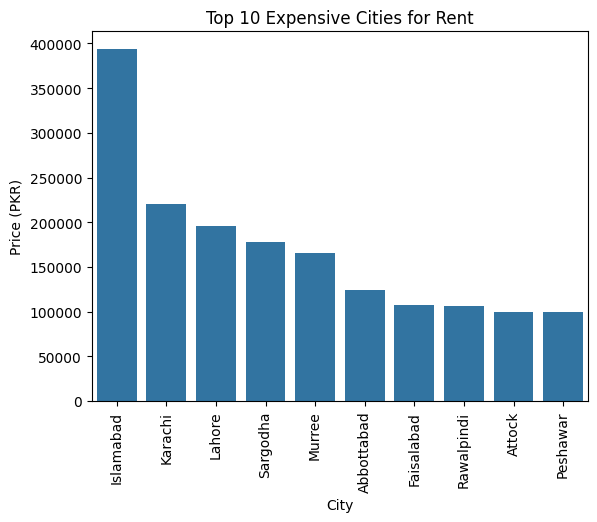

In [246]:
# Top 10 expensive cities to rent a property

sns.barplot(rental.groupby("City")["Price_Clean"].mean().sort_values(ascending=False).head(10).round(2))
plt.xticks(rotation=90)
plt.ylabel("Price (PKR)")
plt.title("Top 10 Expensive Cities for Rent")
plt.show()

## Expensive city to buy property (Top 10)

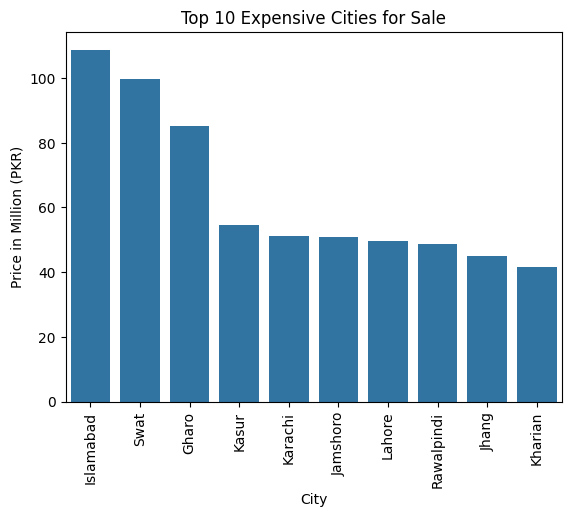

In [240]:
sns.barplot(for_sale.groupby("City")["Price_in_m"].mean().sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.ylabel("Price in Million (PKR)")
plt.title("Top 10 Expensive Cities for Sale")
plt.show()

## Which type of property is expensive to rent And Sell/Buy

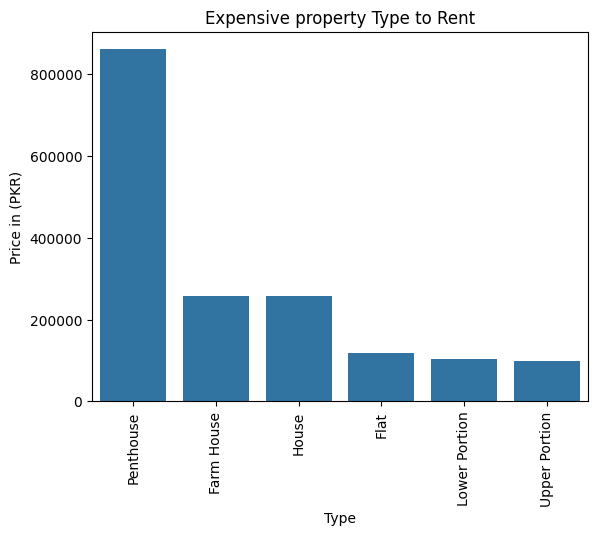

In [258]:
sns.barplot(rental.groupby("Type")["Price_Clean"].mean().sort_values(ascending=False))
plt.xticks(rotation=90)


plt.ylabel("Price in (PKR)")
plt.title("Expensive property Type to Rent")
plt.show()

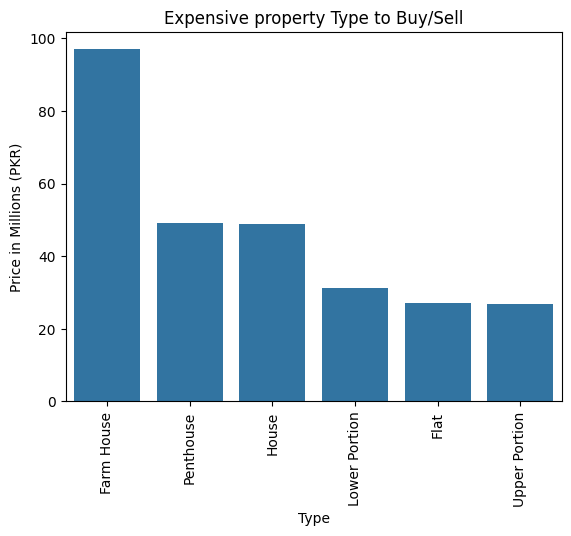

In [257]:
sns.barplot(for_sale.groupby("Type")["Price_in_m"].mean().sort_values(ascending=False))
plt.xticks(rotation=90)


plt.ylabel("Price in Millions (PKR)")
plt.title("Expensive property Type to Buy/Sell")
plt.show()

## Count of properties by City for rent

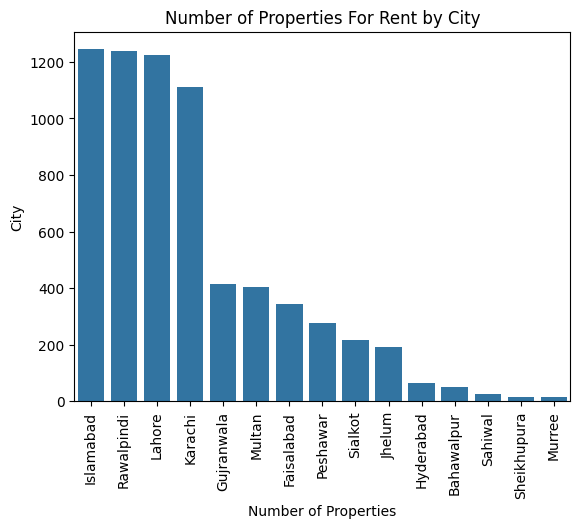

In [310]:
# Bar plot for the count of properties by City for rent

sns.barplot(rental.groupby("City")["Title"].count().sort_values(ascending=False).head(15))
plt.xticks(rotation=90)
plt.title("Number of Properties For Rent by City")
plt.xlabel("Number of Properties")
plt.ylabel("City")
plt.show()

## Count of properties by City for sale

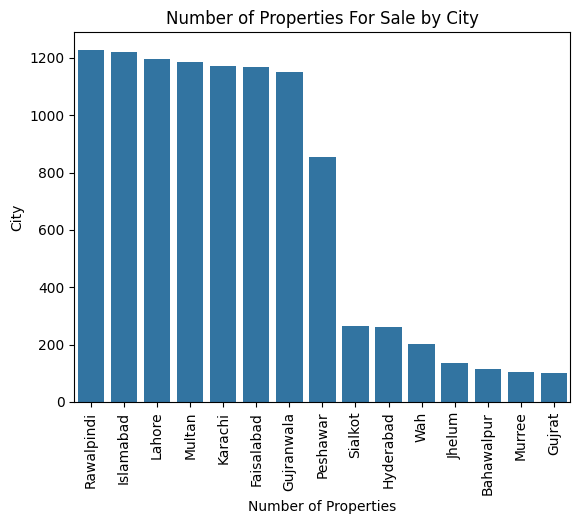

In [311]:
# Bar plot for the count of properties by City for sale

sns.barplot(for_sale.groupby("City")["Title"].count().sort_values(ascending=False).head(15))
plt.xticks(rotation=90)
plt.title("Number of Properties For Sale by City")
plt.xlabel("Number of Properties")
plt.ylabel("City")
plt.show()

# Insights & Recommendations

Property ranges

*   There are more properties to rent in Mid Range
*   There are more properties to Buy/Sell at Mid Range

Farmhouses are expensive to buy followed by Penthouses and then Houses.
However Penthouses bring more rent than Farmhouses.

Islamabad is the most expensive city to either Rent of Buy properties.

When I calculated the price/sq_ft
Galyat was the most expensive.
and interestingly Islamabd was not even in the top 10.

# Conclusion & Next Steps

It Can be concluded that Islamabad overall is expensive to rent and sell/buy.

In Lahore and Karachi property prices are low and rent is High.
Can be best for investors.